<font size="4">  
    ML 5642 Final Project: Number Recognition
</font> 
<font size="3"> 
    <ul>
        <li>Dataset is taken from <a href="https://www.kaggle.com/c/digit-recognizer/data" target="_blank">Kaggle</a></li>
        <li>The goal of this project is to correctly identify digits from a dataset of tens of thousands of handwritten images.</li>
        <li>I am using this dataset as it has been utilized in the previous courses of the section and I have some familiarity with it. I also find image recognition the most interesting of deep learning.</li>
    </ul>
</font>

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# connect to Kaggle dataset and display contents
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# get a feel for what the dataset looks like in pandas
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
num_rows = train_data.shape[0]
num_cols = train_data.shape[1]

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 42000
Number of columns: 785


<font size="3">
For this dataset, and for any image identifying dataset, I will be using a CNN model as the convolutional layers can effectively detect various features. I suspect this model will return a high accuracy and will be one of, if not, the best choice model for this dataset.
</font>

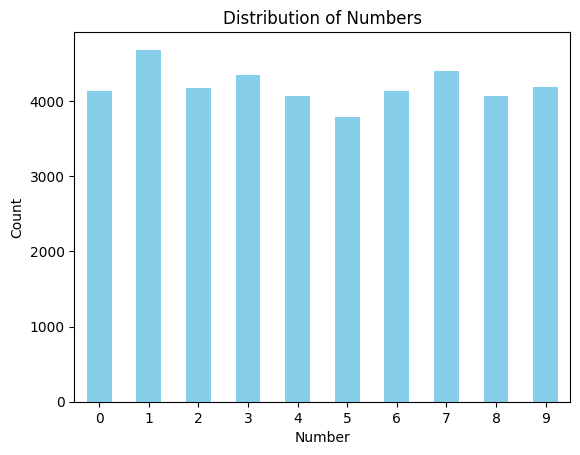

In [5]:
counts = train_data['label'].value_counts().sort_index()
counts.plot(kind='bar', color='skyblue')
plt.xlabel('Number')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Count')
plt.title('Distribution of Numbers')
plt.show()

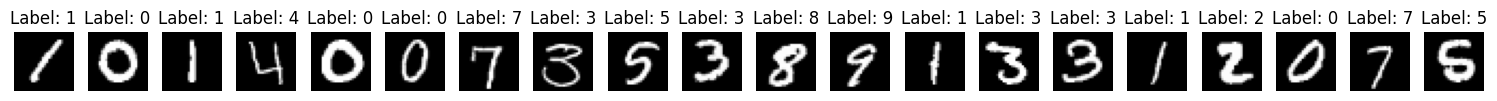

In [6]:
# display 20 images from dataset
plt.figure(figsize=(15, 5))
for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.imshow(train_data.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_data['label'][i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

<font size="4"> 
EDA
</font>
<font size="3"> 
    <ul>
        <li>Standardize pixels</li>
        <li>Reshape features to be in correct model input format</li>
        <li>Data itself is simply a large set of digit images, no nulls or invalid data types to comb through</li>
    </ul>
</font>

In [7]:
# prepare data for model
X = train_data.drop('label', axis=1).values
y = tf.keras.utils.to_categorical(train_data['label'].values, 10)

X = X / 255.0 # normalize
X = X.reshape(-1, 28, 28, 1) # get in correct format for CNN input

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (33600, 28, 28, 1)
Validation data shape: (8400, 28, 28, 1)


In [8]:
model = Sequential([
    # 1st convolutional block
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)), # correct format for CNN input
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # 2nd convolutional block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # 3rd convolutional block
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    # flatten
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(10, activation='softmax') # output Layer
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 10, 10, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 692,682 (2.64 MB)

 Trainable params: 691,786 (2.64 MB)

 Non-trainable params: 896 (3.50 KB)

In [9]:
# using adaptive moment estimation as it is efficient and is commonly used in CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
datagen = ImageDataGenerator(rotation_range=12, zoom_range=0.15, width_shift_range=0.15, height_shift_range=0.15)
datagen.fit(X_train)
history = model.fit(datagen.flow(X_train, y_train, batch_size=64), validation_data=(X_val, y_val), epochs=25) # set number of iterations here

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


525/525 ━━━━━━━━━━━━━━━━━━━━ 138s 255ms/step - accuracy: 0.4978 - loss: 1.6159 - val_accuracy: 0.9038 - val_loss: 0.3145
Epoch 2/25
525/525 ━━━━━━━━━━━━━━━━━━━━ 133s 254ms/step - accuracy: 0.9222 - loss: 0.2514 - val_accuracy: 0.9871 - val_loss: 0.0438
Epoch 3/25
525/525 ━━━━━━━━━━━━━━━━━━━━ 133s 254ms/step - accuracy: 0.9477 - loss: 0.1688 - val_accuracy: 0.9835 - val_loss: 0.0488
Epoch 4/25
525/525 ━━━━━━━━━━━━━━━━━━━━ 134s 255ms/step - accuracy: 0.9560 - loss: 0.1533 - val_accuracy: 0.9869 - val_loss: 0.0424
Epoch 5/25
525/525 ━━━━━━━━━━━━━━━━━━━━ 136s 259ms/step - accuracy: 0.9648 - loss: 0.1216 - val_accuracy: 0.9877 - val_loss: 0.0406
Epoch 6/25
525/525 ━━━━━━━━━━━━━━━━━━━━ 139s 253ms/step - accuracy: 0.9702 - loss: 0.1023 - val_accuracy: 0.9908 - val_loss: 0.0286
Epoch 7/25
525/525 ━━━━━━━━━━━━━━━━━━━━ 133s 253ms/step - accuracy: 0.9714 - loss: 0.1012 - val_accuracy: 0.9926 - val_loss: 0.0217
Epoch 8/25
525/525 ━━━━━━━━━━━━━━━━━━━━ 137s 260ms/step - accuracy: 0.9712 - loss: 0.09

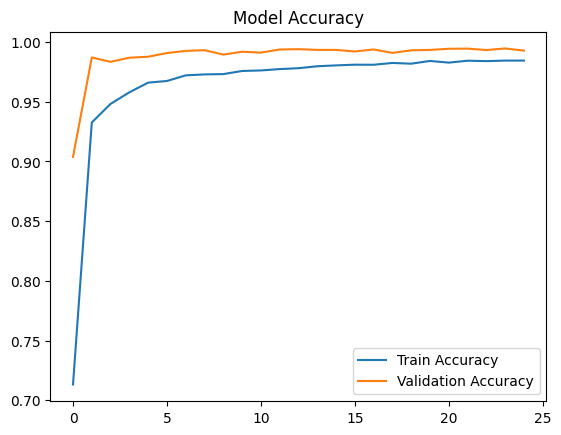

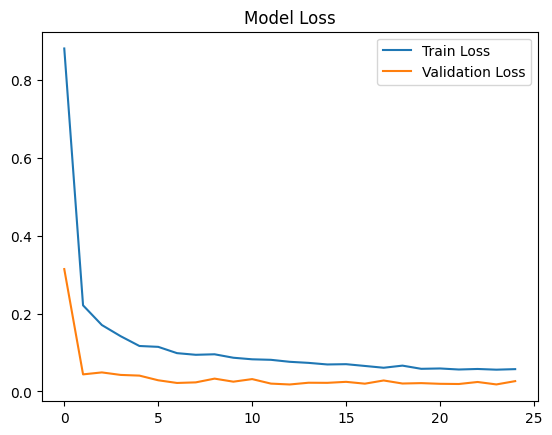

263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9928 - loss: 0.0276
Validation Accuracy: 0.9929


In [11]:
# training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

<font size="4"> 
Conclusion & Analysis
</font>
</br>
<font size="3">
The CNN model returns a high accuracy as we expected with this number recognition image dataset. The convolutional layers in a CNN effectively detect various features. As we can see as the iterations progress we quickly jump to a 99% accuracy where it levels off from there. Same with the inverse of the loss. With an accuracy of over 99% I would not change anything about this model setup. We could continue to hyper tune but at this point the return wouldn't be worth the time in my opinion.
</font>